In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as ss
from scipy.interpolate import interp1d
from scipy.special import expit
from fractions import Fraction
from empiricaldist import Pmf, Cdf
import matplotlib.pyplot as plt
from collections import Counter
import statsmodels.formula.api as smfa

In [30]:
from data.utils import weibull_dist, make_uniform, make_joint, normalize, update_weibull, plot_contour, plot_lifelines, joint_weibull_mean
from data.utils import make_binomial, make_mixture

In [3]:
lam = 3
k = 0.8
actual_dist = weibull_dist(lam, k)
data = actual_dist.rvs(10)
data

array([ 5.60523388,  1.43045098,  1.29845019,  0.22394376, 10.56693007,
        6.83002428,  0.4504895 ,  0.19505563,  3.09753987,  0.09447791])

In [4]:
lams = np.linspace(0.1, 10.1, 101)
ks = np.linspace(0.1, 5.1, 101)
prior_lam = make_uniform(lams, name='lambda')
prior_k = make_uniform(ks, name='k')
prior = make_joint(prior_lam, prior_k)
prior

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,...,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0,10.1
0.10,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
0.15,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
0.20,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
0.25,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
0.30,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.90,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
4.95,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
5.00,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
5.05,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098


In [5]:
lam_mesh, k_mesh, data_mesh = np.meshgrid(prior.columns, prior.index, data)
densities = weibull_dist(lam_mesh, k_mesh).pdf(data_mesh)
likelihood = densities.prod(axis=2)

In [6]:
posterior = prior * likelihood
normalize(posterior)
posterior

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,...,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0,10.1
0.10,1.209746e-09,1.437992e-09,1.548384e-09,1.612994e-09,1.654289e-09,1.681944e-09,1.700908e-09,1.713997e-09,1.722944e-09,1.728875e-09,...,1.451477e-09,1.448691e-09,1.445927e-09,1.443184e-09,1.440462e-09,1.437760e-09,1.435079e-09,1.432417e-09,1.429776e-09,1.427153e-09
0.15,3.529659e-08,5.401403e-08,6.472182e-08,7.152276e-08,7.609718e-08,7.927730e-08,8.152743e-08,8.312866e-08,8.426156e-08,8.504751e-08,...,5.965368e-08,5.941462e-08,5.917791e-08,5.894351e-08,5.871138e-08,5.848150e-08,5.825383e-08,5.802833e-08,5.780497e-08,5.758373e-08
0.20,2.171634e-07,4.980819e-07,7.068704e-07,8.574529e-07,9.668517e-07,1.047076e-06,1.106232e-06,1.149860e-06,1.181830e-06,1.204908e-06,...,6.839909e-07,6.794561e-07,6.749778e-07,6.705552e-07,6.661872e-07,6.618728e-07,6.576111e-07,6.534012e-07,6.492421e-07,6.451329e-07
0.25,4.419649e-07,1.843288e-06,3.347916e-06,4.649263e-06,5.703525e-06,6.535623e-06,7.183468e-06,7.682656e-06,8.062972e-06,8.348374e-06,...,3.785997e-06,3.749402e-06,3.713375e-06,3.677906e-06,3.642981e-06,3.608591e-06,3.574723e-06,3.541367e-06,3.508513e-06,3.476150e-06
0.30,3.409681e-07,3.305308e-06,8.457322e-06,1.415613e-05,1.950615e-05,2.416453e-05,2.805755e-05,3.122611e-05,3.375276e-05,3.572905e-05,...,1.299378e-05,1.282459e-05,1.265860e-05,1.249573e-05,1.233590e-05,1.217905e-05,1.202510e-05,1.187397e-05,1.172561e-05,1.157995e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.90,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.699455e-33,1.789308e-33,1.184106e-33,7.826468e-34,5.168529e-34,3.411425e-34,2.251128e-34,1.485512e-34,9.805465e-35,6.475462e-35
4.95,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.051670e-33,6.944316e-34,4.577544e-34,3.013475e-34,1.981967e-34,1.302763e-34,8.560657e-35,5.625236e-35,3.697214e-35,2.431119e-35
5.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.092103e-34,2.691819e-34,1.767475e-34,1.158922e-34,7.591294e-35,4.969232e-35,3.251708e-35,2.127678e-35,1.392464e-35,9.116891e-36
5.05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.590331e-34,1.042184e-34,6.816527e-35,4.451802e-35,2.904257e-35,1.893290e-35,1.233740e-35,8.038621e-36,5.238494e-36,3.415091e-36


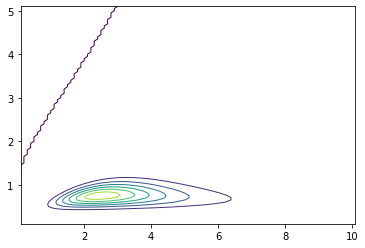

In [7]:
posterior = update_weibull(prior, data)
plot_contour(posterior)

In [8]:
start = np.random.uniform(0, 8, size=10)
start

array([4.84357393, 5.20991553, 0.50740748, 6.24598364, 1.56601423,
       5.22157267, 5.62328484, 4.60951965, 4.76952561, 0.51313645])

In [9]:
duration = actual_dist.rvs(10)
duration

array([ 5.30502986,  1.26990402,  0.48564447,  0.85542538, 10.74616105,
        0.02403935,  0.52358481,  1.73539001, 17.15587542,  0.23387829])

In [10]:
obs = pd.DataFrame(dict(start=start, end=start+duration)).sort_values(by='start', ignore_index=True)
obs

,start,end
0,0.507407,0.993052
1,0.513136,0.747015
2,1.566014,12.312175
3,4.609520,6.344910
4,4.769526,21.925401
5,4.843574,10.148604
6,5.209916,6.479820
7,5.221573,5.245612
8,5.623285,6.146870
9,6.245984,7.101409


In [11]:
censored = obs['end'] > 8
obs.loc[censored, 'end'] = 8
obs.loc[censored, 'status'] = 0
obs

,start,end,status
0,0.507407,0.993052,NaN
1,0.513136,0.747015,NaN
2,1.566014,8.000000,0.0
3,4.609520,6.344910,NaN
4,4.769526,8.000000,0.0
5,4.843574,8.000000,0.0
6,5.209916,6.479820,NaN
7,5.221573,5.245612,NaN
8,5.623285,6.146870,NaN
9,6.245984,7.101409,NaN


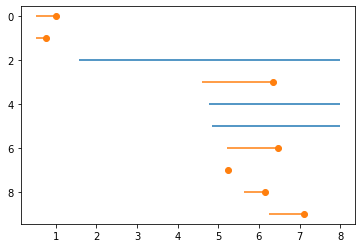

In [12]:
plot_lifelines(obs)

In [13]:
obs['T'] = obs['end'] - obs['start']

In [14]:
data1 = obs.loc[~censored, 'T']
data2 = obs.loc[censored, 'T']

In [15]:
# prior는 lam과 k과 uniform distribution을 따르는 형태
posterior1 = update_weibull(prior, data1)
posterior2 = update_weibull(posterior1, data2, complete=False)

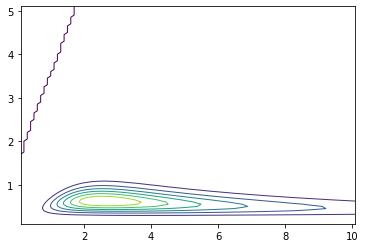

In [16]:
plot_contour(posterior2)

In [17]:
posterior_lam1 = Pmf(posterior1.stack()).marginal(1)
posterior_k1 = Pmf(posterior1.stack()).marginal(0)
posterior_lam2 = Pmf(posterior2.stack()).marginal(1)
posterior_k2 = Pmf(posterior2.stack()).marginal(0)

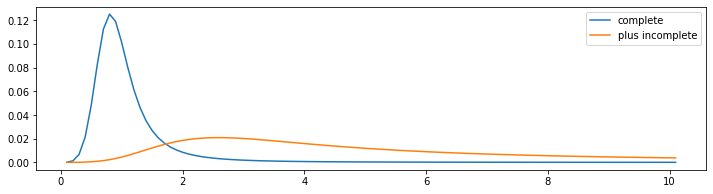

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
posterior_lam1.plot(ax=ax, label='complete')
posterior_lam2.plot(ax=ax, label='plus incomplete')
plt.legend()
plt.show()

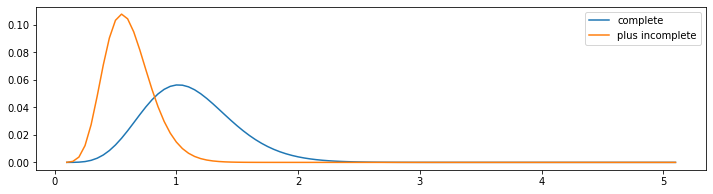

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
posterior_k1.plot(ax=ax, label='complete')
posterior_k2.plot(ax=ax, label='plus incomplete')
plt.legend()
plt.show()

In [20]:
df = pd.read_csv(Path.cwd() / 'data' / 'lamps.csv')

In [21]:
pmf_bulb = Pmf(df['f'].to_numpy(), df['h'])
pmf_bulb.normalize()

50

In [22]:
lams = np.linspace(1000, 2000, 101)
ks = np.linspace(1, 10, 101)
prior_lam = make_uniform(lams, name='lambda')
prior_k = make_uniform(ks, name='k')
prior_bulb = make_joint(prior_lam, prior_k)
prior_bulb

,1000.0,1010.0,1020.0,1030.0,1040.0,1050.0,1060.0,1070.0,1080.0,1090.0,...,1910.0,1920.0,1930.0,1940.0,1950.0,1960.0,1970.0,1980.0,1990.0,2000.0
1.00,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
1.09,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
1.18,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
1.27,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
1.36,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.64,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
9.73,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
9.82,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098
9.91,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,...,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098


In [23]:
# np.repeat 고려 필요
data_bulb = np.repeat(df['h'], df['f'])
len(data_bulb)

50

In [24]:
posterior_bulb = update_weibull(prior_bulb, data_bulb)
posterior_bulb

,1000.0,1010.0,1020.0,1030.0,1040.0,1050.0,1060.0,1070.0,1080.0,1090.0,...,1910.0,1920.0,1930.0,1940.0,1950.0,1960.0,1970.0,1980.0,1990.0,2000.0
1.00,2.036691e-25,2.493608e-25,3.026215e-25,3.641430e-25,4.345817e-25,5.145403e-25,6.045504e-25,7.050539e-25,8.163873e-25,9.387655e-25,...,7.664857e-25,7.158618e-25,6.681529e-25,6.232343e-25,5.809822e-25,5.412741e-25,5.039895e-25,4.690099e-25,4.362199e-25,4.055067e-25
1.09,5.449887e-24,6.974544e-24,8.829718e-24,1.106231e-23,1.372052e-23,1.685283e-23,2.050682e-23,2.472783e-23,2.955764e-23,3.503302e-23,...,3.121966e-23,2.883225e-23,2.660767e-23,2.453702e-23,2.261164e-23,2.082312e-23,1.916334e-23,1.762446e-23,1.619898e-23,1.487970e-23
1.18,9.191480e-23,1.236524e-22,1.641861e-22,2.152736e-22,2.788439e-22,3.569719e-22,4.518437e-22,5.657118e-22,7.008409e-22,8.594456e-22,...,8.700562e-22,7.940719e-22,7.241106e-22,6.597702e-22,6.006662e-22,5.464319e-22,4.967190e-22,4.511975e-22,4.095553e-22,3.714987e-22
1.27,1.020933e-21,1.452568e-21,2.034589e-21,2.807158e-21,3.817195e-21,5.118430e-21,6.771139e-21,8.841536e-21,1.140078e-20,1.452356e-20,...,1.747735e-20,1.575452e-20,1.418797e-20,1.276534e-20,1.147501e-20,1.030609e-20,9.248370e-21,8.292360e-21,7.429216e-21,6.650738e-21
1.36,7.720367e-21,1.169270e-20,1.738347e-20,2.538648e-20,3.644182e-20,5.145211e-20,7.149478e-20,9.782829e-20,1.318906e-19,1.752880e-19,...,2.638086e-19,2.347512e-19,2.086715e-19,1.852970e-19,1.643753e-19,1.456736e-19,1.289775e-19,1.140900e-19,1.008310e-19,8.903585e-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.64,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.019929e-32,2.900361e-33,7.807714e-34,1.997365e-34,4.873211e-35,1.137782e-35,2.550092e-36,5.502813e-37,1.146417e-37,2.311798e-38
9.73,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.465081e-33,7.063749e-34,1.912073e-34,4.908859e-35,1.199752e-35,2.801296e-36,6.269106e-37,1.348845e-37,2.798161e-38,5.611800e-39
9.82,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.850465e-34,1.691105e-34,4.607380e-35,1.188109e-35,2.911206e-36,6.802808e-37,1.521188e-37,3.265433e-38,6.749266e-39,1.346916e-39
9.91,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.363156e-34,3.978967e-35,1.092192e-35,2.831542e-36,6.961596e-37,1.629319e-37,3.642970e-38,7.807243e-39,1.608712e-39,3.196358e-40


In [25]:
lam_mesh, k_mesh = np.meshgrid(prior_bulb.columns, prior_bulb.index)
means = weibull_dist(lam_mesh, k_mesh).mean()
pd.DataFrame(means)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,1000.000000,1010.000000,1020.000000,1030.000000,1040.000000,1050.000000,1060.000000,1070.000000,1080.000000,1090.000000,...,1910.000000,1920.000000,1930.000000,1940.000000,1950.000000,1960.000000,1970.000000,1980.000000,1990.000000,2000.000000
1,967.856502,977.535067,987.213632,996.892197,1006.570762,1016.249327,1025.927892,1035.606457,1045.285022,1054.963587,...,1848.605919,1858.284484,1867.963049,1877.641614,1887.320179,1896.998744,1906.677309,1916.355874,1926.034439,1935.713004
2,944.841470,954.289885,963.738300,973.186714,982.635129,992.083544,1001.531959,1010.980373,1020.428788,1029.877203,...,1804.647208,1814.095623,1823.544038,1832.992452,1842.440867,1851.889282,1861.337696,1870.786111,1880.234526,1889.682941
3,928.100129,937.381130,946.662132,955.943133,965.224134,974.505135,983.786137,993.067138,1002.348139,1011.629141,...,1772.671246,1781.952248,1791.233249,1800.514250,1809.795251,1819.076253,1828.357254,1837.638255,1846.919257,1856.200258
4,915.799798,924.957796,934.115794,943.273792,952.431790,961.589788,970.747786,979.905784,989.063782,998.221780,...,1749.177615,1758.335613,1767.493611,1776.651609,1785.809607,1794.967605,1804.125603,1813.283601,1822.441599,1831.599597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,949.855938,959.354497,968.853057,978.351616,987.850175,997.348735,1006.847294,1016.345853,1025.844413,1035.342972,...,1814.224841,1823.723401,1833.221960,1842.720519,1852.219079,1861.717638,1871.216198,1880.714757,1890.213316,1899.711876
97,950.237983,959.740363,969.242743,978.745123,988.247503,997.749883,1007.252262,1016.754642,1026.257022,1035.759402,...,1814.954548,1824.456928,1833.959308,1843.461688,1852.964068,1862.466448,1871.968827,1881.471207,1890.973587,1900.475967
98,950.614391,960.120535,969.626679,979.132823,988.638967,998.145111,1007.651255,1017.157399,1026.663543,1036.169687,...,1815.673488,1825.179632,1834.685776,1844.191919,1853.698063,1863.204207,1872.710351,1882.216495,1891.722639,1901.228783
99,950.985281,960.495134,970.004987,979.514840,989.024693,998.534546,1008.044398,1017.554251,1027.064104,1036.573957,...,1816.381888,1825.891740,1835.401593,1844.911446,1854.421299,1863.931152,1873.441005,1882.950857,1892.460710,1901.970563


In [26]:
prod = means * posterior_bulb
prod.sum().sum()

1412.7242773758674

In [27]:
joint_weibull_mean(posterior_bulb)

1412.7242773758671

In [32]:
t = 1000
n = 100
pmf_seq = []
for (k, lam) in posterior_bulb.stack().index:
    prob_dead = weibull_dist(lam, k).cdf(t)
    pmf = make_binomial(n, prob_dead)
    pmf_seq.append(pmf)

post_pred = make_mixture(posterior_bulb.stack(), pmf_seq)
post_pred

,probs
0,2.160056e-05
1,1.752240e-04
2,7.492730e-04
3,2.246610e-03
4,5.302288e-03
...,...
96,2.183673e-31
97,1.384322e-32
98,6.571840e-34
99,2.075257e-35


<AxesSubplot:>

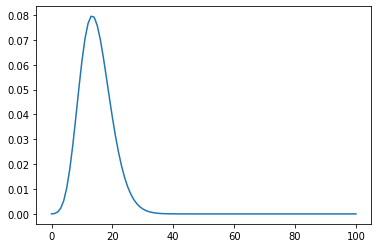

In [33]:
post_pred.plot()